__Author:__ Bram Van de Sande

__Date:__ 12 JUN 2019

__Outline:__ Notebook to create figures for SCENIC's protocol manuscript.

## Utility functions 

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [2]:
IMAGES_FOLDER = os.path.join(".", "figures")

In [3]:
def savesvg(fname: str, fig, folder: str=IMAGES_FOLDER) -> None:
    """
    Save figure as vector-based SVG image format.
    """
    fig.tight_layout()
    fig.savefig(os.path.join(folder, fname), format='svg')

# FIGURE 3 - Speed comparison between SCENIC versions

In [20]:
df_performance = pd.DataFrame(data = {
    'duration': [17*60+10,3*60.0+4, 8*60.0+12, 0*60.0+13.87] + [17*60+10, 7*60.0 + 18, 130*60 + 44, 22.0] + [2*3600+42*60+38, 7*60.0 + 18, 130*60 + 44, 22.0],
    'step': ['GRNBoost2[1] (48 cores)', 'candidate regulon generation[2]', 'cisTarget[3] (24 cores)', 'AUCell[4] (8 cores)'] * 2 + ['GENIE3[1] (48 cores)', 'candidate regulon generation[2]', 'cisTarget[3] (24 cores)', 'AUCell[4] (8 cores)'],
    'package': ['pySCENIC\n(GRNBoost2)'] * 4 + ['\\textit{R} SCENIC\n(GRNBoost2)'] * 4 + ['\\textit{R} SCENIC\n(GENIE3)'] * 4
})

In [21]:
df_plot = df_performance.set_index(['package', 'step']).unstack('step')
df_plot.columns = df_plot.columns.droplevel(0)
df_plot = df_plot /60.0

In [22]:
columns = df_plot.columns
df_plot.index.name = ''
df_plot = df_plot[[columns[1], columns[2], columns[3], columns[4], columns[0]]]

In [23]:
df_plot

step,GENIE3[1] (48 cores),GRNBoost2[1] (48 cores),candidate regulon generation[2],cisTarget[3] (24 cores),AUCell[4] (8 cores)
,,,,,
\textit{R} SCENIC\n(GENIE3),162.633333,NaN,7.300000,130.733333,0.366667
\textit{R} SCENIC\n(GRNBoost2),NaN,17.166667,7.300000,130.733333,0.366667
pySCENIC\n(GRNBoost2),NaN,17.166667,3.066667,8.200000,0.231167


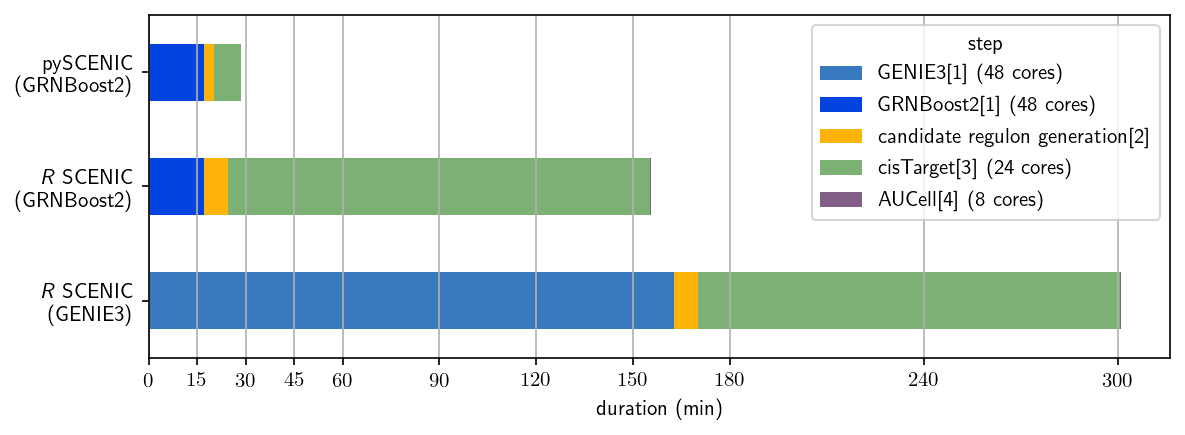

In [24]:
colors = ["windows blue", "blue", "amber", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))
fig = plt.figure(figsize=(8,3), dpi=150)
df_plot.plot(kind='barh', stacked=True, ax=plt.gca())
#plt.title('Wall time (Zeisel et al.)')
plt.xlabel('duration (min)')
plt.xticks([0, 15, 30, 45, 60, 90, 120, 150, 180, 240, 300])
plt.grid(axis='x')
savesvg("figure3.svg", fig)